# Data Cleaning

In [8]:
import pandas as pd

df_cand = pd.read_csv('candidates.csv')
df_cand

,expID,cone angle,TEP,calc P shift,pKa,Pauling ionic radii,Hansen-dD,Hansen-dP,Hansen-dH
0,1,165.870000,2223.370000,-5.9813,10.329,95,18.4,16.4,10.2
1,2,166.890370,2218.319819,-11.5167,10.329,95,18.4,16.4,10.2
2,3,172.523488,2217.505928,-9.5830,10.329,95,18.4,16.4,10.2
3,4,195.290000,2213.360000,-34.9056,10.329,95,18.4,16.4,10.2
4,5,174.662976,2218.794147,-5.9295,10.329,95,18.4,16.4,10.2
...,...,...,...,...,...,...,...,...,...
1495,1496,174.360017,2210.257593,8.4693,13.997,322,15.5,0.0,0.0
1496,1497,185.300000,2206.200000,65.5283,13.997,322,15.5,0.0,0.0
1497,1498,171.395358,2213.980043,-31.8604,13.997,322,15.5,0.0,0.0
1498,1499,120.020000,2219.320000,-63.3000,13.997,322,15.5,0.0,0.0


In [9]:
df_res = pd.read_csv('results_log.csv')
df_res

,seq,time,expID,ligand,base,solvent,objective,Unnamed: 7
0,1,58:35.6,1282,7,6,9,-2.355503,NaN
1,2,58:36.3,1493,8,10,10,-5.495197,NaN
2,3,58:37.0,897,12,10,6,-5.434688,NaN
3,4,58:37.8,920,5,2,7,-2.928562,NaN
4,5,54:47.2,1022,2,9,7,-2.565554,NaN
...,...,...,...,...,...,...,...,...
187,188,50:05.1,279,9,9,2,-2.853519,NaN
188,189,46:25.9,1242,12,3,9,-5.445098,NaN
189,190,46:26.6,1344,9,10,9,-3.481690,NaN
190,191,46:27.3,1336,1,10,9,-1.068086,NaN


In [13]:
df_merged = pd.merge(df_res, df_cand, on='expID')
df_merged

,seq,time,expID,ligand,base,solvent,objective,Unnamed: 7,cone angle,TEP,calc P shift,pKa,Pauling ionic radii,Hansen-dD,Hansen-dP,Hansen-dH
0,1,58:35.6,1282,7,6,9,-2.355503,NaN,165.442532,2228.123853,-7.3657,12.375,133,19.0,1.8,7.4
1,2,58:36.3,1493,8,10,10,-5.495197,NaN,184.594242,2234.942905,-7.6081,13.997,322,15.5,0.0,0.0
2,3,58:37.0,897,12,10,6,-5.434688,NaN,185.300000,2206.200000,65.5283,13.997,322,17.5,8.8,0.0
3,4,58:37.8,920,5,2,7,-2.928562,NaN,174.662976,2218.794147,-5.9295,6.351,95,15.8,3.7,6.3
4,5,54:47.2,1022,2,9,7,-2.565554,NaN,166.890370,2218.319819,-11.5167,3.170,169,15.8,3.7,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,50:05.1,279,9,9,2,-2.853519,NaN,172.550000,2232.060000,-76.6378,3.170,169,17.4,13.7,11.3
188,189,46:25.9,1242,12,3,9,-5.445098,NaN,185.300000,2206.200000,65.5283,13.997,95,19.0,1.8,7.4
189,190,46:26.6,1344,9,10,9,-3.481690,NaN,172.550000,2232.060000,-76.6378,13.997,322,19.0,1.8,7.4
190,191,46:27.3,1336,1,10,9,-1.068086,NaN,165.870000,2223.370000,-5.9813,13.997,322,19.0,1.8,7.4


In [14]:
df_merged.to_csv('test.csv')

# Re-Analysis

In [1]:
import pandas as pd
import physbo
import re

df = pd.read_csv('cleaned.csv')
# 8 features
df = df.iloc[:,6:]

with open('8features_4columns_covariance.csv','w') as f:
    f.write('predict1,predict2,predict3,predict4,covar1,covar2,covar3,covar4\n')

with open('8features_covariance.csv','w') as f:
    f.write('predict,covar\n')

idx = 0
for x in range( 48 ):
    idx += 4
    Xy = df.iloc[:idx,:].dropna()
    X = Xy.iloc[:,:-1].to_numpy()
    y = Xy.iloc[:,-1].to_numpy()
    cov = physbo.gp.cov.gauss( X.shape[1], ard=False )
    mean = physbo.gp.mean.const()
    lik = physbo.gp.lik.gauss()
    gp = physbo.gp.model(lik=lik, mean=mean, cov=cov)
    config = physbo.misc.set_config()
    
    gp.fit(X, y, config)
    gp.prepare( X, y )
    next_X = df.iloc[idx:idx+4,:-1].to_numpy()
    fmean = gp.get_post_fmean( X, next_X )
    fcov  = gp.get_post_fcov( X, next_X )
    
    with open('8features_4columns_covariance.csv','a') as f:
        strn = str(list(fmean)+list(fcov))
        f.write(re.sub(r'[ \[\]]', '', strn)+'\n')
    
    with open('8features_covariance.csv','a') as f2:
        f2.write(str(fmean[0])+ ',' + str(fcov[0]) +'\n')
        f2.write(str(fmean[1])+ ',' + str(fcov[1])+'\n')
        f2.write(str(fmean[2])+ ',' + str(fcov[2])+'\n')
        f2.write(str(fmean[3])+ ',' + str(fcov[3])+'\n')

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 5.664237769519863
50 -th epoch marginal likelihood 5.64667596774514
100 -th epoch marginal likelihood 5.6424577151297814
150 -th epoch marginal likelihood 5.641514987802442
200 -th epoch marginal likelihood 5.6409134023766345
250 -th epoch marginal likelihood 5.640383669894555
300 -th epoch marginal likelihood 5.639913442791272
350 -th epoch marginal likelihood 5.639494833882414
400 -th epoch marginal likelihood 5.639120808578001
450 -th epoch marginal likelihood 5.638785315320105
500 -th epoch marginal likelihood 5.638483216206373
Done

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 13.872216308826967
50 -th epoch marginal likelihood 13.726543321232718
100 -th epoch marginal likelihood 13.618351305458699
150 -th epoch marginal likelihood 13.518976444697335
200 -th epoch marginal likeli

IndexError: index 0 is out of bounds for axis 0 with size 0

In [3]:

df

,ligand,base,solvent,cone angle,TEP,calc P shift,pKa,Pauling ionic radii,Hansen-dD,Hansen-dP,Hansen-dH,objective
0,7,6,9,165.442532,2228.123853,-7.3657,12.375,133,19.0,1.8,7.4,-2.355503
1,8,10,10,184.594242,2234.942905,-7.6081,13.997,322,15.5,0.0,0.0,-5.495197
2,12,10,6,185.300000,2206.200000,65.5283,13.997,322,17.5,8.8,0.0,-5.434688
3,5,2,7,174.662976,2218.794147,-5.9295,6.351,95,15.8,3.7,6.3,-2.928562
4,2,9,7,166.890370,2218.319819,-11.5167,3.170,169,15.8,3.7,6.3,-2.565554
...,...,...,...,...,...,...,...,...,...,...,...,...
187,9,9,2,172.550000,2232.060000,-76.6378,3.170,169,17.4,13.7,11.3,-2.853519
188,12,3,9,185.300000,2206.200000,65.5283,13.997,95,19.0,1.8,7.4,-5.445098
189,9,10,9,172.550000,2232.060000,-76.6378,13.997,322,19.0,1.8,7.4,-3.481690
190,1,10,9,165.870000,2223.370000,-5.9813,13.997,322,19.0,1.8,7.4,-1.068086


In [1]:
import pandas as pd
import physbo
import re

df = pd.read_csv('cleaned.csv')
# 11 features
df = df.iloc[:,3:]

with open('11features_4columns_covariance.csv','w') as f:
    f.write('predict1,predict2,predict3,predict4,covar1,covar2,covar3,covar4\n')

with open('11features_covariance.csv','w') as f:
    f.write('predict,covar\n')

idx = 0
for x in range( 48 ):
    idx += 4
    Xy = df.iloc[:idx,:].dropna()
    X = Xy.iloc[:,:-1].to_numpy()
    y = Xy.iloc[:,-1].to_numpy()
    cov = physbo.gp.cov.gauss( X.shape[1], ard=False )
    mean = physbo.gp.mean.const()
    lik = physbo.gp.lik.gauss()
    gp = physbo.gp.model(lik=lik, mean=mean, cov=cov)
    config = physbo.misc.set_config()
    
    gp.fit(X, y, config)
    gp.prepare( X, y )
    next_X = df.iloc[idx:idx+4,:-1].to_numpy()
    fmean = gp.get_post_fmean( X, next_X )
    fcov  = gp.get_post_fcov( X, next_X )
    
    with open('11features_4columns_covariance.csv','a') as f:
        strn = str(list(fmean)+list(fcov))
        f.write(re.sub(r'[ \[\]]', '', strn)+'\n')
    
    with open('11features_covariance.csv','a') as f2:
        f2.write(str(fmean[0])+ ',' + str(fcov[0]) +'\n')
        f2.write(str(fmean[1])+ ',' + str(fcov[1])+'\n')
        f2.write(str(fmean[2])+ ',' + str(fcov[2])+'\n')
        f2.write(str(fmean[3])+ ',' + str(fcov[3])+'\n')

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 5.66665433830511
50 -th epoch marginal likelihood 5.648982086583787
100 -th epoch marginal likelihood 5.644700808882735
150 -th epoch marginal likelihood 5.643733877162123
200 -th epoch marginal likelihood 5.6431191780652945
250 -th epoch marginal likelihood 5.642578188497019
300 -th epoch marginal likelihood 5.642097947720108
350 -th epoch marginal likelihood 5.641670386543545
400 -th epoch marginal likelihood 5.641288323329778
450 -th epoch marginal likelihood 5.640945585305541
500 -th epoch marginal likelihood 5.640636933339591
Done

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 13.872216308826967
50 -th epoch marginal likelihood 13.726543321232718
100 -th epoch marginal likelihood 13.618351305458699
150 -th epoch marginal likelihood 13.518976444697335
200 -th epoch marginal likelih

IndexError: index 0 is out of bounds for axis 0 with size 0

In [1]:
import pandas as pd
import physbo
import re

df = pd.read_csv('cleaned.csv')
# 11 features
df = df.iloc[:,2:]

with open('12features_4columns_covariance.csv','w') as f:
    f.write('predict1,predict2,predict3,predict4,covar1,covar2,covar3,covar4\n')

with open('12features_covariance.csv','w') as f:
    f.write('predict,covar\n')

idx = 0
for x in range( 48 ):
    idx += 4
    Xy = df.iloc[:idx,:].dropna()
    X = Xy.iloc[:,:-1].to_numpy()
    y = Xy.iloc[:,-1].to_numpy()
    cov = physbo.gp.cov.gauss( X.shape[1], ard=False )
    mean = physbo.gp.mean.const()
    lik = physbo.gp.lik.gauss()
    gp = physbo.gp.model(lik=lik, mean=mean, cov=cov)
    config = physbo.misc.set_config()
    
    gp.fit(X, y, config)
    gp.prepare( X, y )
    next_X = df.iloc[idx:idx+4,:-1].to_numpy()
    fmean = gp.get_post_fmean( X, next_X )
    fcov  = gp.get_post_fcov( X, next_X )
    
    with open('12features_4columns_covariance.csv','a') as f:
        strn = str(list(fmean)+list(fcov))
        f.write(re.sub(r'[ \[\]]', '', strn)+'\n')
    
    with open('12features_covariance.csv','a') as f2:
        f2.write(str(fmean[0])+ ',' + str(fcov[0]) +'\n')
        f2.write(str(fmean[1])+ ',' + str(fcov[1])+'\n')
        f2.write(str(fmean[2])+ ',' + str(fcov[2])+'\n')
        f2.write(str(fmean[3])+ ',' + str(fcov[3])+'\n')

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 7.101898161977647
50 -th epoch marginal likelihood 7.0967272936497725
100 -th epoch marginal likelihood 7.095576276637786
150 -th epoch marginal likelihood 7.095482113513812
200 -th epoch marginal likelihood 7.095479980815582
250 -th epoch marginal likelihood 7.095479976156957
300 -th epoch marginal likelihood 7.09547997612382
350 -th epoch marginal likelihood 7.095479976123799
400 -th epoch marginal likelihood 7.095479976123797
450 -th epoch marginal likelihood 7.095479976123798
500 -th epoch marginal likelihood 7.095479976123797
Done

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 13.872216308826967
50 -th epoch marginal likelihood 13.726543321232718
100 -th epoch marginal likelihood 13.618351305458699
150 -th epoch marginal likelihood 13.518976444697335
200 -th epoch marginal likelih

IndexError: index 0 is out of bounds for axis 0 with size 0

# 図にする

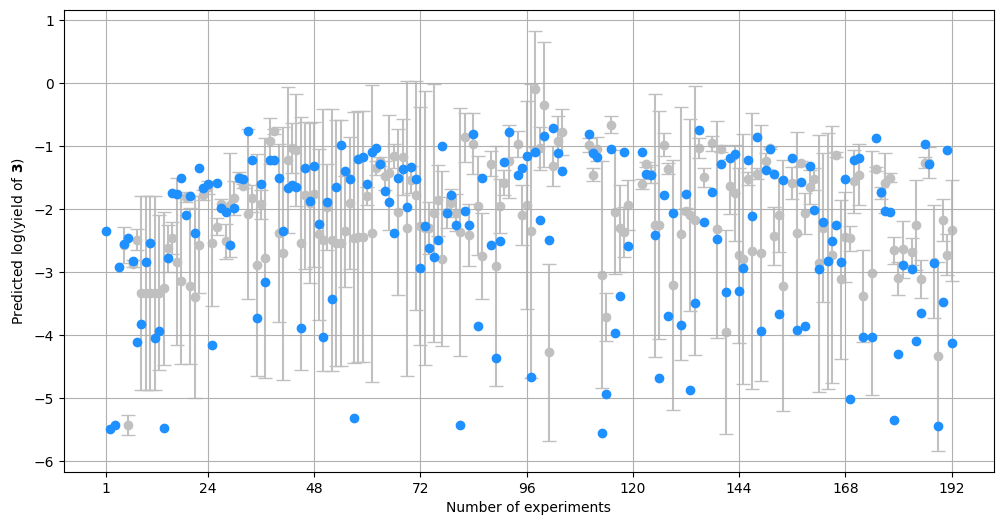

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('8features_covariance.csv')
df2 = df.dropna()

# データ例
x = [1, 2, 3, 4, 5]
y = [2.1, 2.4, 2.9, 3.5, 4.2]
yerr = [0.2, 0.3, 0.15, 0.4, 0.25]  # エラーバー（上下の誤差）

# エラーバー付き散布図
plt.figure(figsize=(12, 6))
plt.errorbar(list(df2.index+1), list(df2.iloc[:,1]), yerr=list(df2.iloc[:,2]), fmt='o', capsize=5, color='silver', zorder=1)
plt.scatter(df.iloc[:192,0], df.iloc[:192,3], color='dodgerblue', zorder=2)
plt.xlabel("Number of experiments")
plt.ylabel("Predicted log(yield of $\mathbf{3}$)")
plt.xticks(ticks=[1,24,48,72,96,120,144,168,192])
plt.grid(True)
plt.savefig('8features_covariance.png')
plt.show()